In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Question 1 ###
**Which countries have made the largest improvements in life expectancy? who has better life expectancy male or female? what is the current status of the male and female life expectancy in year 2017 in the entire world?**

In [4]:
# getting the data set into dataframe df_mortality_life_expectancy
df_mortality_life_expectancy = pd.read_csv('mortality_life_expectancy.csv')

#looking at the dataset.
df_mortality_life_expectancy.head(2)


,country_code,country_name,year,infant_mortality,infant_mortality_male,infant_mortality_female,life_expectancy,life_expectancy_male,life_expectancy_female,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female,mortality_rate_1to4,mortality_rate_1to4_male,mortality_rate_1to4_female
0,SI,Slovenia,2036,3.39,3.76,3.00,80.90,77.51,84.52,3.93,4.39,3.44,0.54,0.63,0.44
1,SI,Slovenia,2022,3.76,4.22,3.27,79.11,75.58,82.89,4.43,5.02,3.81,0.68,0.80,0.54


In [5]:
# getting a new dataframe for country name, year, life expectancy to calculate the impovement of the countries over  
#  the years from 1950 to 2050. Some countries will have no data from 1950.
df_life_expectancy = df_mortality_life_expectancy[['country_name','year','life_expectancy']].sort_values(
                    ['country_name','year'],ascending=[1,1]).groupby(['country_name'])
#the dataframe stores the group of data together, here in our case it is country wise.
df_life_expectancy.get_group('United States')

,country_name,year,life_expectancy
3100,United States,2014,79.54
3090,United States,2015,79.68
3101,United States,2016,79.82
3102,United States,2017,79.96
3103,United States,2018,80.10
3104,United States,2019,80.24
3105,United States,2020,80.39
3106,United States,2021,80.54
3107,United States,2022,80.69
3108,United States,2023,80.86


In [6]:
# getting dataframe for the max life expectancy for each country and the year. In our case it would be 2050.
df_max_life_expectancy = df_life_expectancy.max()
df_max_life_expectancy.rename(columns={'year':'year_max','life_expectancy':'life_expectancy_max'}, inplace = True)

#printing the kind of data we have in our dataframe
df_max_life_expectancy.head(2)

,year_max,life_expectancy_max
country_name,,
Afghanistan,2050,64.51
Albania,2050,82.32


In [7]:
# getting dataframe for the min life expectancy for each country and the year. In our case it would be the first year 
# from which the data is available.
df_min_life_expectancy = df_life_expectancy.min()
df_min_life_expectancy.rename(columns = {'year':'year_min','life_expectancy':'life_expectancy_min'}, inplace = True)

#printing the kind of data we have in our dataframe
df_min_life_expectancy.head(2)

,year_min,life_expectancy_min
country_name,,
Afghanistan,1979,38.77
Albania,1989,70.17


In [8]:
# getting the current year and expectancy rate for the current year
df_current_life_expectancy = (df_mortality_life_expectancy[['country_name','year','life_expectancy']]
                              [df_mortality_life_expectancy['year']==2017].sort_values(['country_name']))
df_current_life_expectancy.set_index('country_name', inplace = True)
df_current_life_expectancy.rename(columns={'year':'current_year','life_expectancy':'life_expectancy_cur'},inplace=True)

#printing the kind of data we have in our dataframe
df_current_life_expectancy.head(2)

,current_year,life_expectancy_cur
country_name,,
Afghanistan,2017,51.67
Albania,2017,78.47


In [9]:
# concatenating all three dataframes(max, min and current) created above to calculate the improvement in life 
# expectance for each country and the number of years it took to reach(year 2050) at max life expectancy.
df_life_expectancy_improvement = (pd.concat([df_min_life_expectancy, df_max_life_expectancy, 
                                             df_current_life_expectancy], axis = 1))
df_life_expectancy_improvement['life_expectancy_diff'] = (df_life_expectancy_improvement['life_expectancy_max']
                                                        - df_life_expectancy_improvement['life_expectancy_min'])
df_life_expectancy_improvement['year_diff'] = (df_life_expectancy_improvement['year_max']
                                              - df_life_expectancy_improvement['year_min'])
df_life_expectancy_improvement.sort_values(['life_expectancy_diff'], ascending = [0],inplace = True)

# Printing the best 5 performers of the life expectancy.
df_life_expectancy_improvement.head(5)

,year_min,life_expectancy_min,year_max,life_expectancy_max,current_year,life_expectancy_cur,life_expectancy_diff,year_diff
country_name,,,,,,,,
Rwanda,1978,10.01,2050,71.96,2017,60.51,61.95,72
Cambodia,1962,16.20,2050,74.70,2017,64.87,58.50,88
Somalia,1975,17.18,2050,65.50,2017,52.77,48.32,75
Haiti,1971,29.47,2050,73.69,2017,64.20,44.22,79
Guinea,1955,30.74,2050,73.23,2017,61.03,42.49,95


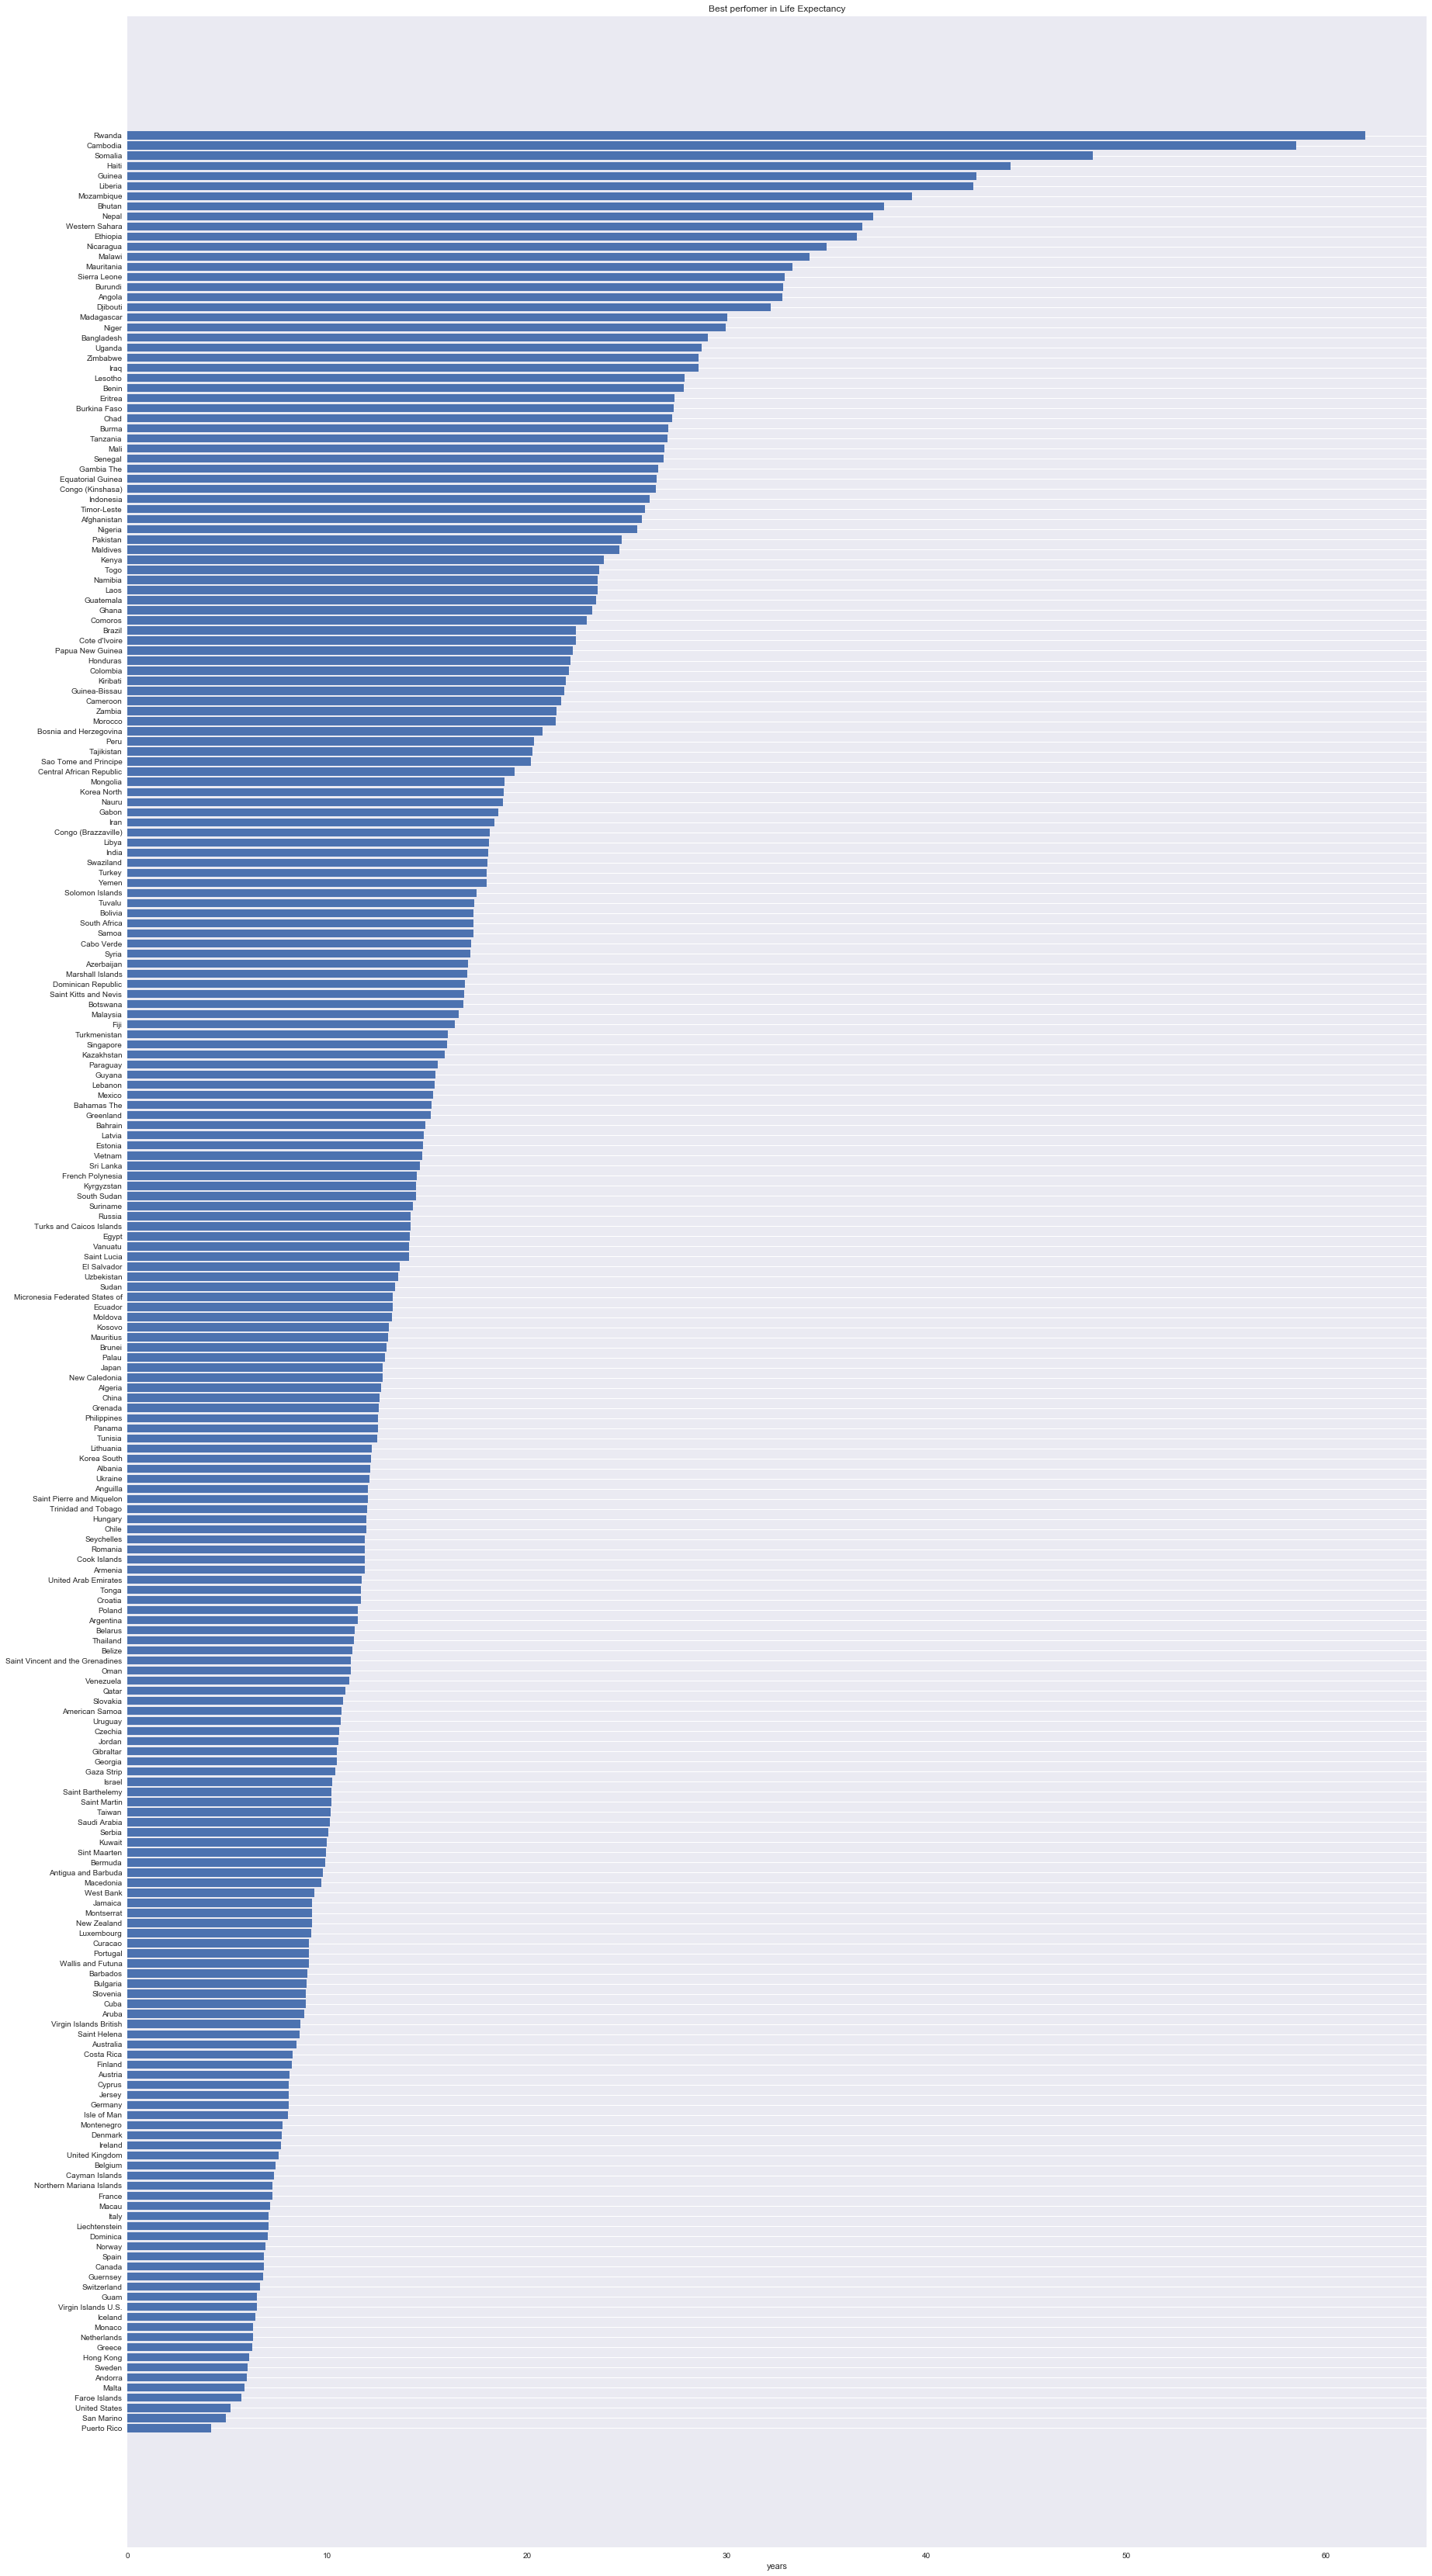

In [10]:
#graph to represent the best performers in the life expectancy country wise. 

#ascending order of the dataframe
df_life_expectancy_improvement.sort_values(['life_expectancy_diff'], ascending = [1],inplace = True)
country_name = df_life_expectancy_improvement.index

y_pos = np.arange(len(country_name))

plt.figure(figsize=(30,60))

#creating a horizonal bar graph.
plt.barh(y_pos,df_life_expectancy_improvement['life_expectancy_diff'], align = 'center')
plt.yticks(y_pos,country_name)
plt.title('Best perfomer in Life Expectancy')
plt.xlabel('years')
plt.grid(axis = 'x')
plt.show()



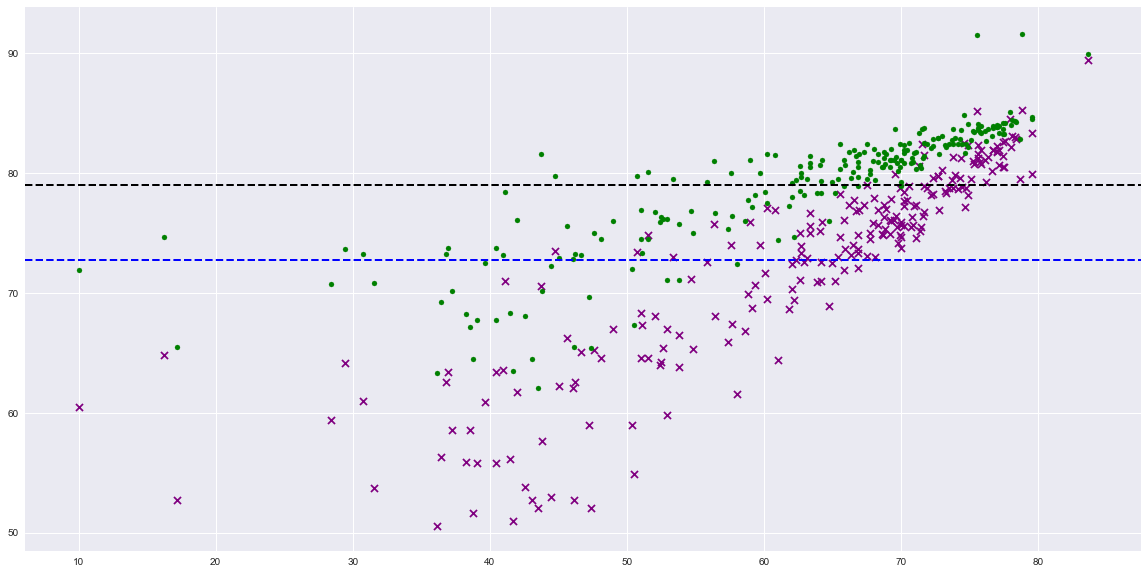

In [11]:
#graph to show that these current life expectancy and life expectancy at 2050 relation. all the countries are
#improving

plt.figure(figsize=(20,10))
plt.scatter(x=df_life_expectancy_improvement['life_expectancy_min'], 
            y=df_life_expectancy_improvement['life_expectancy_cur'],
           color = 'purple', marker = 'x', s=50)
plt.scatter(x=df_life_expectancy_improvement['life_expectancy_min'], 
            y=df_life_expectancy_improvement['life_expectancy_max'],
           color = 'green', marker = 'o', s=25)
plt.axhline(df_life_expectancy_improvement['life_expectancy_cur'].mean(), color='b', linestyle='dashed', linewidth=2)
plt.axhline(df_life_expectancy_improvement['life_expectancy_max'].mean(), color='k', linestyle='dashed', linewidth=2)
#a.empty, a.bool(), a.item(), a.any() or a.all().
plt.show()

In [12]:
# getting new dataframe for male and female life expectance
df_life_expectancy_all = df_mortality_life_expectancy[
    ['country_name','year','life_expectancy','life_expectancy_male','life_expectancy_female']]
df_life_expectancy_all.head(2)

,country_name,year,life_expectancy,life_expectancy_male,life_expectancy_female
0,Slovenia,2036,80.90,77.51,84.52
1,Slovenia,2022,79.11,75.58,82.89


In [13]:
# check if male has the better expectancy.
df_chk_expectancy_male = df_life_expectancy_all[
    ['country_name','year','life_expectancy','life_expectancy_male','life_expectancy_female']][
    df_life_expectancy_all['life_expectancy_male'] >= df_life_expectancy_all['life_expectancy_female']]
df_chk_expectancy_male.shape


(235, 5)

In [14]:
# check if male has the better expectancy.
df_chk_expectancy_female = df_life_expectancy_all[
    ['country_name','year','life_expectancy','life_expectancy_male','life_expectancy_female']][
    df_life_expectancy_all['life_expectancy_female'] >= df_life_expectancy_all['life_expectancy_male']]
df_chk_expectancy_female.shape

(14872, 5)

### 2017 Status of male/female expectancy in the world. ###

In [15]:
# getting the dataframe for the current life expectancy in the year 2017.
df_life_expectancy_all_2017 = df_life_expectancy_all[
    ['country_name','year','life_expectancy','life_expectancy_male','life_expectancy_female']][
    df_life_expectancy_all['year']==2017]
df_life_expectancy_all_2017.head(2)

,country_name,year,life_expectancy,life_expectancy_male,life_expectancy_female
56,Slovenia,2017,78.34,74.75,82.16
119,Latvia,2017,74.69,70.13,79.48


In [16]:
df_chk_expectancy_male_2017 = df_life_expectancy_all_2017[
    ['country_name','year','life_expectancy','life_expectancy_male','life_expectancy_female']][
    df_life_expectancy_all_2017['life_expectancy_male'] >= df_life_expectancy_all_2017['life_expectancy_female']]
df_chk_expectancy_male_2017.shape

(3, 5)

In [17]:
df_chk_expectancy_female_2017 = df_life_expectancy_all_2017[
    ['country_name','year','life_expectancy','life_expectancy_male','life_expectancy_female']][
    df_life_expectancy_all_2017['life_expectancy_female'] >= df_life_expectancy_all_2017['life_expectancy_male']]
df_chk_expectancy_female_2017.shape

(225, 5)

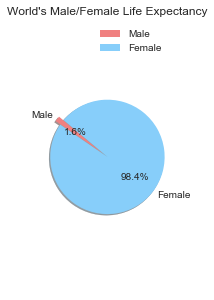

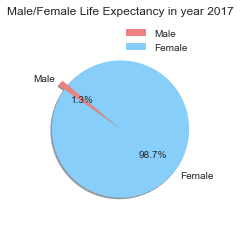

In [18]:
plt.subplots(figsize = (5,5))

#Creating a pie chart for depecting overall life expectancy of male and female.
plt.subplot(1,2,1)
labels = 'Male', 'Female'
size = [235,14872]
color = ['lightcoral','lightskyblue']
explode = (0,0.1)

plt.pie(size, explode=explode, labels=labels, colors=color,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels,loc='best')
plt.title("World's Male/Female Life Expectancy")
plt.axis('equal')
plt.show()


#Creating a pie chart for depecting overall life expectancy of male and female in year 2017.
plt.subplot(1,2,2)
labels = 'Male', 'Female'
size = [3,225]
color = ['lightcoral','lightskyblue']
explode = (0,0.1)

plt.pie(size, explode=explode, labels=labels, colors=color,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels,loc='best')
plt.title('Male/Female Life Expectancy in year 2017')
plt.axis('equal')
plt.show()


## Question 2##
**What is the age group best for fertility rates? Is the same age group is best in all the continents?**

In [19]:
#This analysis is based on continents hence we need continent in our dataset.
df_country_continent = pd.read_csv('country_continent.csv')
df_country_continent.drop(df_country_continent.columns[[0,1,3]], axis=1, inplace = True)
df_country_continent.head(2)

,country_name,continent
0,Afghanistan,Asia
1,Albania,Europe


In [20]:
# get the fertility dataframe
df_age_specific_fertility_rates = pd.read_csv('age_specific_fertility_rates.csv')
df_age_specific_fertility_rates.head(2)

,country_code,country_name,year,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate,gross_reproduction_rate,sex_ratio_at_birth
0,SI,Slovenia,2036,8.5,60.2,112.0,86.3,32.0,8.8,3.7,1.5555,0.7529,1.0660
1,SI,Slovenia,2022,7.5,56.4,106.1,75.5,26.7,6.4,2.3,1.4110,0.6829,1.0661


In [21]:
#merging the continent column to the fertility_rates dataframe, below codes should remais commented else it would 
#create now merged dataframe each time it gets executed.
#df_age_specific_fertility_rates = (df_age_specific_fertility_rates.merge(df_country_continent,
 #                                                                   how = 'left', on = 'country_name'))
#df_age_specific_fertility_rates.drop(df_age_specific_fertility_rates.columns[[13,14]], axis=1, inplace = True)

# After merging the dataset looks like below.
df_age_specific_fertility_rates.head(2)

,country_code,country_name,year,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate,gross_reproduction_rate,sex_ratio_at_birth,continent
0,SI,Slovenia,2036,8.5,60.2,112.0,86.3,32.0,8.8,3.7,1.5555,0.7529,1.0660,Europe
1,SI,Slovenia,2022,7.5,56.4,106.1,75.5,26.7,6.4,2.3,1.4110,0.6829,1.0661,Europe


In [22]:
# variable to hold the continent name.
continent_names = df_country_continent['continent'].unique()
continent_names

array(['Asia', 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [23]:

# create a dataframe with the data only till year 2017.

df_age_specific_fertility_rates_till_2017 = df_age_specific_fertility_rates[
    ['continent','country_name','year','fertility_rate_15_19','fertility_rate_20_24',
    'fertility_rate_25_29','fertility_rate_30_34','fertility_rate_35_39','fertility_rate_40_44',
    'fertility_rate_45_49','total_fertility_rate']][
    df_age_specific_fertility_rates['year']<=2017]
# Checking the data
df_age_specific_fertility_rates_till_2017.head(2)

,continent,country_name,year,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate
15,Europe,Slovenia,1992,19.3,102.6,90.3,39.1,12.1,2.7,0.2,1.3304
31,Europe,Slovenia,1991,21.1,112.1,95.1,40.0,13.5,3.1,0.1,1.4227


In [24]:
df_best_age_group = df_age_specific_fertility_rates_till_2017[['fertility_rate_15_19','fertility_rate_20_24',
    'fertility_rate_25_29','fertility_rate_30_34','fertility_rate_35_39','fertility_rate_40_44',
    'fertility_rate_45_49','total_fertility_rate']]
df_best_age_group.shape

(7582, 8)

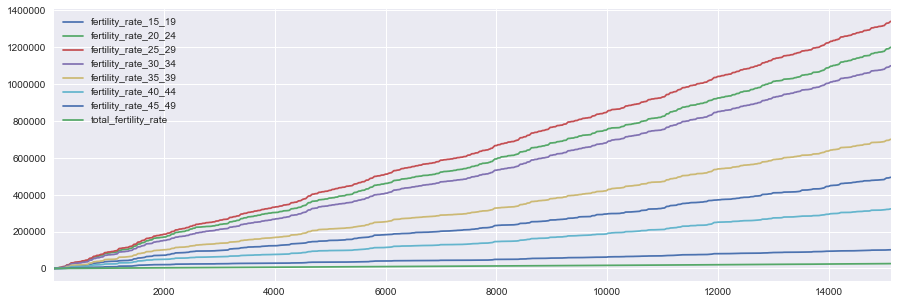

In [25]:
# Graph to show the best age group for fertility rate all over the world.
#df_best_age_group = df_best_age_group.cumsum()
plt.figure()
df_best_age_group.plot(figsize=(15,5))
plt.show()

### Analysis for fertility rates in different continents. ###
**Is the same age group is best in all the continents?**

In [26]:
# need to group dataset into continents.
df_age_specific_fertility_rates_till_2017 = (df_age_specific_fertility_rates_till_2017.groupby(
                                            df_age_specific_fertility_rates_till_2017['continent']))
                              

In [27]:
df_fertility_rate_asia = df_age_specific_fertility_rates_till_2017.get_group('Asia')
df_fertility_rate_asia.shape

(1603, 11)

In [45]:
df_age_group_asia = df_fertility_rate_asia[['fertility_rate_15_19','fertility_rate_20_24',
    'fertility_rate_25_29','fertility_rate_30_34','fertility_rate_35_39','fertility_rate_40_44',
    'fertility_rate_45_49','total_fertility_rate']]
df_age_group_asia.head(2)

,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate
138,45.5,269.6,272.8,195.6,117.4,46.5,12.7,4.80
154,44.3,271.0,283.2,200.2,118.9,50.4,13.9,4.91


In [29]:
df_fertility_rate_Europe = df_age_specific_fertility_rates_till_2017.get_group('Europe')
df_fertility_rate_Europe.shape

(1438, 11)

In [46]:
df_age_group_Europe = df_fertility_rate_Europe[['fertility_rate_15_19','fertility_rate_20_24',
    'fertility_rate_25_29','fertility_rate_30_34','fertility_rate_35_39','fertility_rate_40_44',
    'fertility_rate_45_49','total_fertility_rate']]
df_age_group_Europe.head(2)

,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate
15,19.3,102.6,90.3,39.1,12.1,2.7,0.2,1.3304
31,21.1,112.1,95.1,40.0,13.5,3.1,0.1,1.4227


In [31]:
df_fertility_rate_Africa = df_age_specific_fertility_rates_till_2017.get_group('Africa')
df_fertility_rate_Africa.shape

(2250, 11)

In [47]:
df_age_group_Africa = df_fertility_rate_Africa[['fertility_rate_15_19','fertility_rate_20_24',
    'fertility_rate_25_29','fertility_rate_30_34','fertility_rate_35_39','fertility_rate_40_44',
    'fertility_rate_45_49','total_fertility_rate']]
df_age_group_Africa.head(2)

,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate
200,66.0,141.6,177.4,167.5,117.1,71.3,31.2,3.86
201,67.8,144.1,179.3,169.8,119.6,73.2,32.2,3.93


In [33]:
df_fertility_rate_NA = df_age_specific_fertility_rates_till_2017.get_group('North America')
df_fertility_rate_NA.shape

(1195, 11)

In [48]:
df_age_group_NA = df_fertility_rate_NA[['fertility_rate_15_19','fertility_rate_20_24',
    'fertility_rate_25_29','fertility_rate_30_34','fertility_rate_35_39','fertility_rate_40_44',
    'fertility_rate_45_49','total_fertility_rate']]
df_age_group_NA.head(2)

,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate
352,14.6,67.3,110.1,85.2,35.6,12.2,1.9,1.6342
362,33.3,106.3,132.0,89.2,43.3,14.6,2.2,2.1048


In [35]:
df_fertility_rate_SA = df_age_specific_fertility_rates_till_2017.get_group('South America')
df_fertility_rate_SA.shape

(479, 11)

In [49]:
df_age_group_SA = df_fertility_rate_SA[['fertility_rate_15_19','fertility_rate_20_24',
    'fertility_rate_25_29','fertility_rate_30_34','fertility_rate_35_39','fertility_rate_40_44',
    'fertility_rate_45_49','total_fertility_rate']]
df_age_group_SA.head(2)

,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate
551,101.2,187.9,171.2,124.6,73.7,27.3,5.3,3.456
567,102.2,191.4,175.2,128.0,75.8,28.1,5.4,3.530


In [37]:
df_fertility_rate_Oceania = df_age_specific_fertility_rates_till_2017.get_group('Oceania')
df_fertility_rate_Oceania.shape

(617, 11)

In [50]:
df_age_group_Oceania = df_fertility_rate_Oceania[['fertility_rate_15_19','fertility_rate_20_24',
    'fertility_rate_25_29','fertility_rate_30_34','fertility_rate_35_39','fertility_rate_40_44',
    'fertility_rate_45_49','total_fertility_rate']]
df_age_group_Oceania.head(2)

,fertility_rate_15_19,fertility_rate_20_24,fertility_rate_25_29,fertility_rate_30_34,fertility_rate_35_39,fertility_rate_40_44,fertility_rate_45_49,total_fertility_rate
753,69.0,196.7,210.0,155.0,77.1,31.2,4.6,3.7180
769,72.1,203.6,214.7,158.1,79.1,32.2,4.7,3.8221


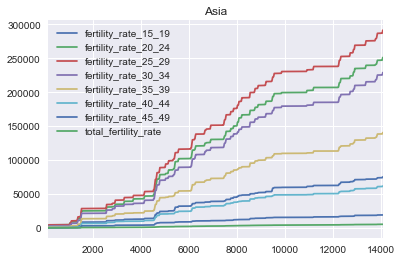

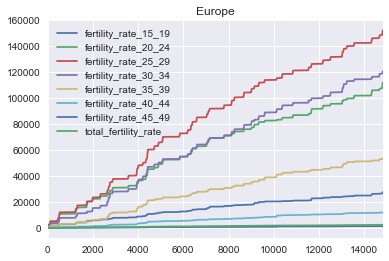

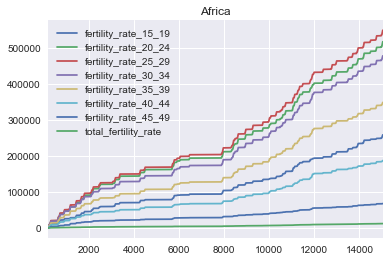

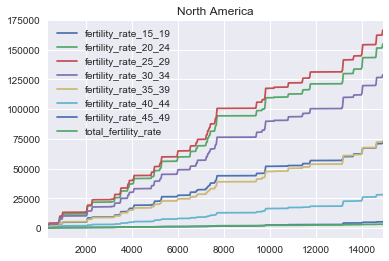

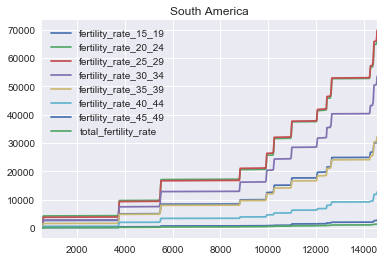

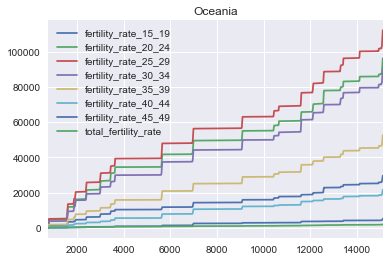

In [52]:
# subplot for all the continents to find out the best age group with the fertility rate.
#df_age_group_asia = df_age_group_asia.cumsum()
#df_age_group_Europe = df_age_group_Europe.cumsum()
#df_age_group_Africa = df_age_group_Africa.cumsum()
#df_age_group_NA = df_age_group_NA.cumsum()
#df_age_group_SA = df_age_group_SA.cumsum()
#df_age_group_Oceania = df_age_group_Oceania.cumsum()
#plt.subplots(1,2)
#plt.figure()
df_age_group_asia.plot(title = 'Asia')
df_age_group_Europe.plot(title = 'Europe')
df_age_group_Africa.plot(title = 'Africa')
df_age_group_NA.plot(title = 'North America')
df_age_group_SA.plot(title = 'South America')
df_age_group_Oceania.plot(title = 'Oceania')
plt.show()

**Conclusion:** _The age group 25-29 is best age group for the fertility rate all over the world. However I find two interesting patterns which are as below:_

1) In Europe the second best age group for the fertility rate is 30-34, which is different from all other continents.

2) In South America, the age groups 20-24 and 25-29 both are almost similar.

### Question 3 ###
**Hypothesis: Children are at great risk of dying before age 5 if they are born in African countries.**

_What is the trend in last 20 years? is there any increase/decrease in mortality rate of the African countries?_


In [101]:
# get the dataframe for the African continents.
#df_country_continent
#df_mortality_life_expectancy.head(2)
#creating a dataframe to hold the 
#df = df_mortality_life_expectancy[['country_name','year','mortality_rate_under5','mortality_rate_under5_male',
#                                  'mortality_rate_under5_female']]
df.head(2)


,country_name,year,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female
0,Slovenia,2036,3.93,4.39,3.44
1,Slovenia,2022,4.43,5.02,3.81


In [103]:
# mearging with continent data frame
#df_mortality_under5 = (df.merge(df_country_continent, how = 'left', on = 'country_name'))
df_mortality_under5 = df_mortality_under5.groupby(['continent'])


In [208]:
#  dataframe for Africa continent.
#df_mortality_under5_Africa = df_mortality_under5.get_group('Africa')
#df_mortality_under5_Africa.head(2)
#  dataframe for Africa continent for the year 2017.
#df_mortality_under5_Africa_2017 = (df_mortality_under5_Africa[df_mortality_under5_Africa['year']==2017])

#calculation of max, min and average(mortality rate under 5) of all the countries in Africa for male, femal and all.
# These calculation is done to give a clear numbers and is done only for african continent.
under5_Africa_max = df_mortality_under5_Africa_2017['mortality_rate_under5'].max()
under5_Africa_min = df_mortality_under5_Africa_2017['mortality_rate_under5'].min()
under5_Africa_avg = df_mortality_under5_Africa_2017['mortality_rate_under5'].mean()

under5_male_Africa_max = df_mortality_under5_Africa_2017['mortality_rate_under5_male'].max()
under5_male_Africa_min = df_mortality_under5_Africa_2017['mortality_rate_under5_male'].min()
under5_male_Africa_avg = df_mortality_under5_Africa_2017['mortality_rate_under5_male'].mean()

under5_female_Africa_max = df_mortality_under5_Africa_2017['mortality_rate_under5_female'].max()
under5_female_Africa_min = df_mortality_under5_Africa_2017['mortality_rate_under5_female'].min()
under5_female_Africa_avg = df_mortality_under5_Africa_2017['mortality_rate_under5_female'].mean()

print('Maximum mortality rate for Africa continent= {}'.format(under5_Africa_max))
print('Minimum mortality rate for Africa continent= ',under5_Africa_min)
print('Average mortality rate for Africa continent= ' ,under5_Africa_avg)
print('Maximum male mortality rate for Africa continent= ' ,under5_male_Africa_max)
print('Maximum male mortality rate for Africa continent= ' ,under5_male_Africa_min)
print('Average male mortality rate for Africa continent= ' ,under5_male_Africa_avg)
print('Maximum female mortality rate for Africa continent= ' ,under5_female_Africa_max)
print('Minimum female mortality rate for Africa continent= ' ,under5_female_Africa_min)
print('Avegrage female mortality rate for Africa continent= ' ,under5_female_Africa_avg)


Maximum mortality rate for Africa continent= 153.34
Minimum mortality rate for Africa continent=  11.07
Average mortality rate for Africa continent=  74.40035714285715
Maximum male mortality rate for Africa continent=  164.11
Maximum male mortality rate for Africa continent=  11.59
Average male mortality rate for Africa continent=  80.13267857142856
Maximum female mortality rate for Africa continent=  142.63
Minimum female mortality rate for Africa continent=  9.05
Avegrage female mortality rate for Africa continent=  68.48089285714285


In [187]:
#getting data for all the countries in Asia for all the years.
df_mortality_under5_Asia = df_mortality_under5.get_group('Asia')

# dataframe for Asia continent for the year 2017.
df_mortality_under5_Asia_2017 = (df_mortality_under5_Asia[['country_name','mortality_rate_under5',
                                'mortality_rate_under5_male','mortality_rate_under5_female']]
                                 [df_mortality_under5_Asia['year']==2017])

#Resting the index
df_mortality_under5_Asia_2017 = df_mortality_under5_Asia_2017.set_index('country_name')

#printing the data to check if we have the correct dataframe.
df_mortality_under5_Asia_2017.head(2)

,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female
country_name,,,
Mongolia,25.24,28.95,21.33
Russia,8.43,9.52,7.28


In [174]:
#getting data for all the countries in Europe for all the years.
df_mortality_under5_Europe = df_mortality_under5.get_group('Europe')

# dataframe for Europe continent for the year 2017.
df_mortality_under5_Europe_2017 = (df_mortality_under5_Europe[['country_name','mortality_rate_under5',
                                'mortality_rate_under5_male','mortality_rate_under5_female']]
                                 [df_mortality_under5_Europe['year']==2017])

#Resting the index
df_mortality_under5_Europe_2017 = df_mortality_under5_Europe_2017.set_index('country_name')

#printing the data to check if we have the correct dataframe.
df_mortality_under5_Europe_2017.head(2)


,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female
country_name,,,
Slovenia,4.68,5.32,3.99
Latvia,6.46,7.09,5.82


In [177]:
#getting data for all the countries in North America(NA) for all the years.
df_mortality_under5_NA = df_mortality_under5.get_group('North America')

# dataframe for North America(NA) continent for the year 2017.
df_mortality_under5_NA_2017 = (df_mortality_under5_NA[['country_name','mortality_rate_under5',
                                'mortality_rate_under5_male','mortality_rate_under5_female']]
                                 [df_mortality_under5_NA['year']==2017])

#Resting the index
df_mortality_under5_NA_2017 = df_mortality_under5_NA_2017.set_index('country_name')

#printing the data to check if we have the correct dataframe.
df_mortality_under5_NA_2017.head(2)


,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female
country_name,,,
Saint Barthelemy,7.04,8.0,6.05
Mexico,13.52,15.1,11.86


In [178]:
#getting data for all the countries in South America for all the years.
df_mortality_under5_SA = df_mortality_under5.get_group('South America')

# dataframe for South America(SA) continent for the year 2017.
df_mortality_under5_SA_2017 = (df_mortality_under5_SA[['country_name','mortality_rate_under5',
                                'mortality_rate_under5_male','mortality_rate_under5_female']]
                                 [df_mortality_under5_SA['year']==2017])

#Resting the index
df_mortality_under5_SA_2017 = df_mortality_under5_SA_2017.set_index('country_name')

#printing the data to check if we have the correct dataframe.
df_mortality_under5_SA_2017.head(2)


,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female
country_name,,,
Venezuela,14.14,14.63,13.63
Peru,23.51,26.59,20.31


In [179]:
#getting data for all the countries in Oceania for all the years.
df_mortality_under5_Oceania = df_mortality_under5.get_group('Oceania')

# dataframe for Oceania continent for the year 2017.
df_mortality_under5_Oceania_2017 = (df_mortality_under5_Oceania[['country_name','mortality_rate_under5',
                                'mortality_rate_under5_male','mortality_rate_under5_female']]
                                 [df_mortality_under5_Oceania['year']==2017])

#Resting the index
df_mortality_under5_Oceania_2017 = df_mortality_under5_Oceania_2017.set_index('country_name')

#printing the data to check if we have the correct dataframe.
df_mortality_under5_Oceania_2017.head(2)


,mortality_rate_under5,mortality_rate_under5_male,mortality_rate_under5_female
country_name,,,
Nauru,9.91,13.03,7.30
Tuvalu,45.79,45.10,46.51


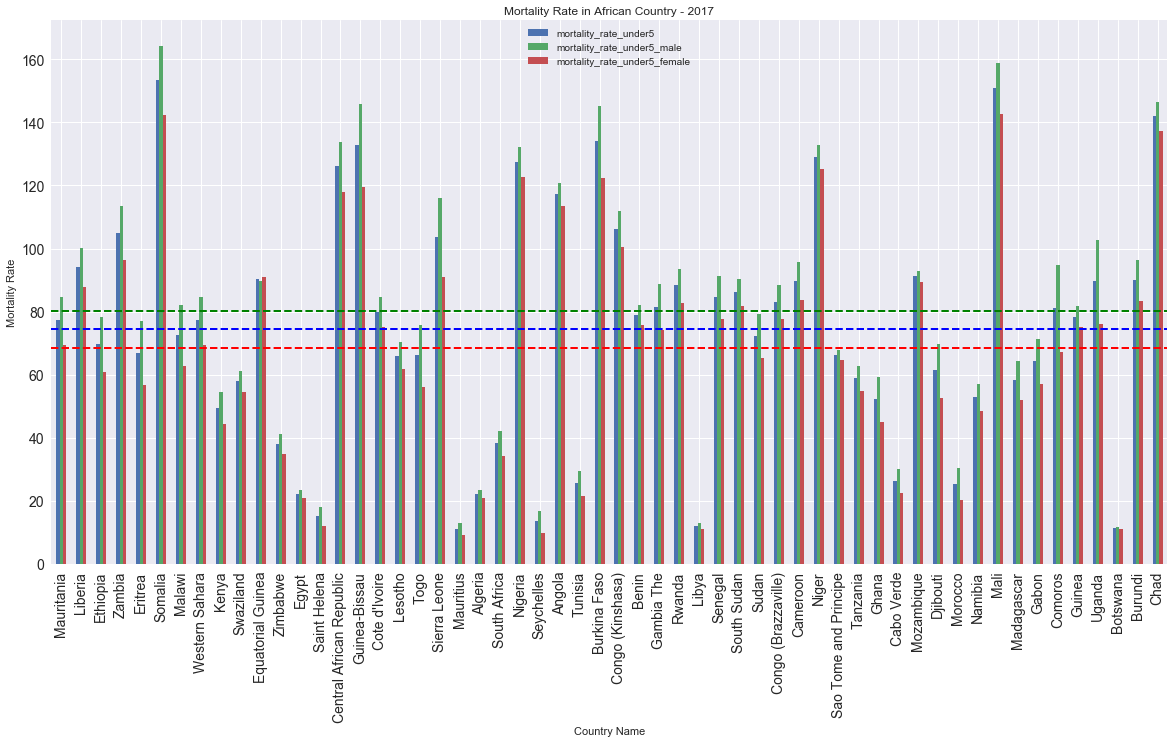

In [207]:
#plt.figure(figsize=(30,60))
df_mortality_under5_Africa_2017.plot.bar(figsize = (20,10), title = 'Mortality Rate in African Country - 2017',
                                        fontsize = 14)
# Horizontal line are the average of mortality rate, mortality rate for male and female. colors are same as of bars
plt.axhline(df_mortality_under5_Africa_2017['mortality_rate_under5'].mean(), color='b',linestyle='dashed',linewidth=2)
plt.axhline(df_mortality_under5_Africa_2017['mortality_rate_under5_male'].mean(),
            color='g',linestyle='dashed',linewidth=2)
plt.axhline(df_mortality_under5_Africa_2017['mortality_rate_under5_female'].mean(),
            color='r',linestyle='dashed',linewidth=2)

plt.ylabel('Mortality Rate')
plt.xlabel('Country Name')
plt.show()

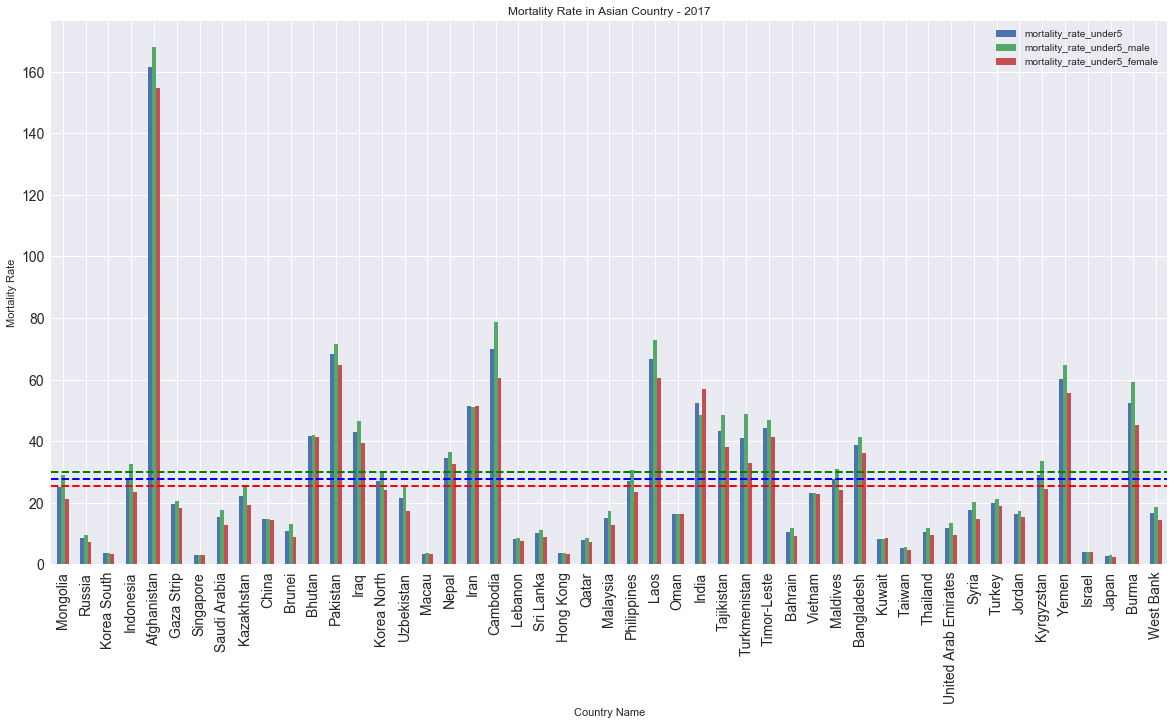

In [206]:
df_mortality_under5_Asia_2017.plot.bar(figsize = (20,10), title = 'Mortality Rate in Asian Country - 2017',
                                        fontsize = 14)
# Horizontal line are the average of mortality rate, mortality rate for male and female. colors are same as of bars
plt.axhline(df_mortality_under5_Asia_2017['mortality_rate_under5'].mean(), color='b',linestyle='dashed',linewidth=2)
plt.axhline(df_mortality_under5_Asia_2017['mortality_rate_under5_male'].mean(),
            color='g',linestyle='dashed',linewidth=2)
plt.axhline(df_mortality_under5_Asia_2017['mortality_rate_under5_female'].mean(),
            color='r',linestyle='dashed',linewidth=2)
plt.ylabel('Mortality Rate')
plt.xlabel('Country Name')
plt.show()

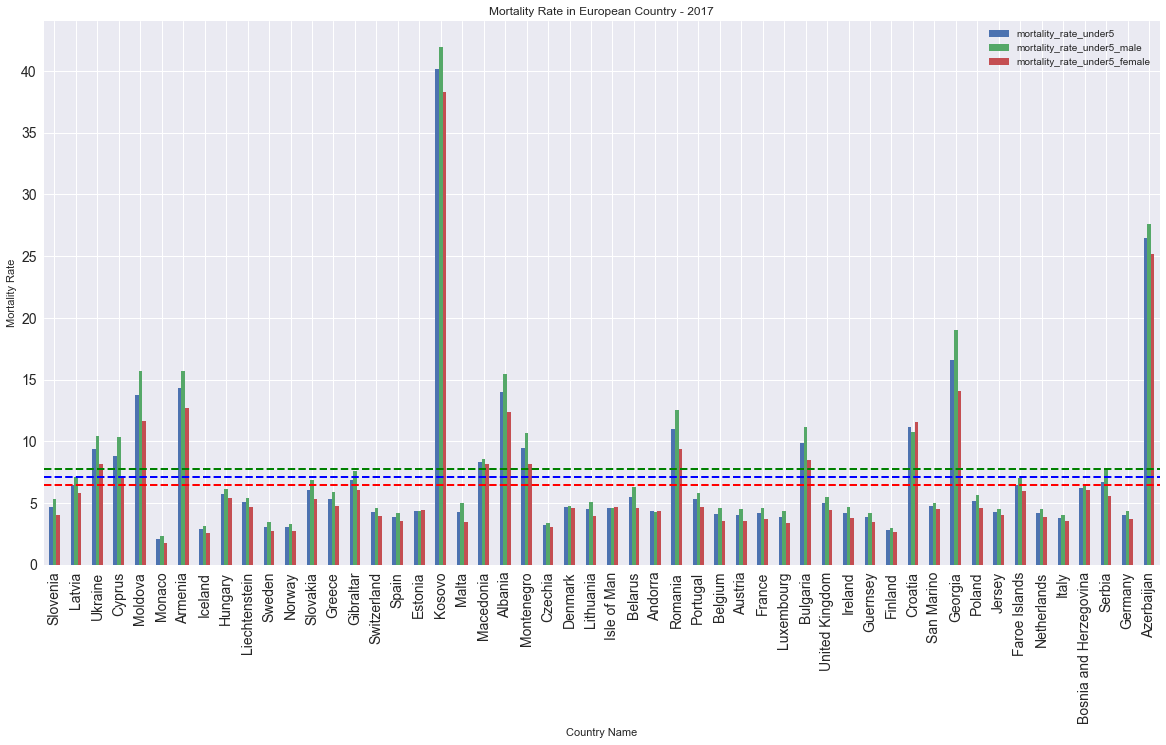

In [205]:
df_mortality_under5_Europe_2017.plot.bar(figsize = (20,10), title = 'Mortality Rate in European Country - 2017',
                                        fontsize = 14)
# Horizontal line are the average of mortality rate, mortality rate for male and female. colors are same as of bars
plt.axhline(df_mortality_under5_Europe_2017['mortality_rate_under5'].mean(), color='b',linestyle='dashed',linewidth=2)
plt.axhline(df_mortality_under5_Europe_2017['mortality_rate_under5_male'].mean(),
            color='g',linestyle='dashed',linewidth=2)
plt.axhline(df_mortality_under5_Europe_2017['mortality_rate_under5_female'].mean(),
            color='r',linestyle='dashed',linewidth=2)
plt.ylabel('Mortality Rate')
plt.xlabel('Country Name')
plt.show()

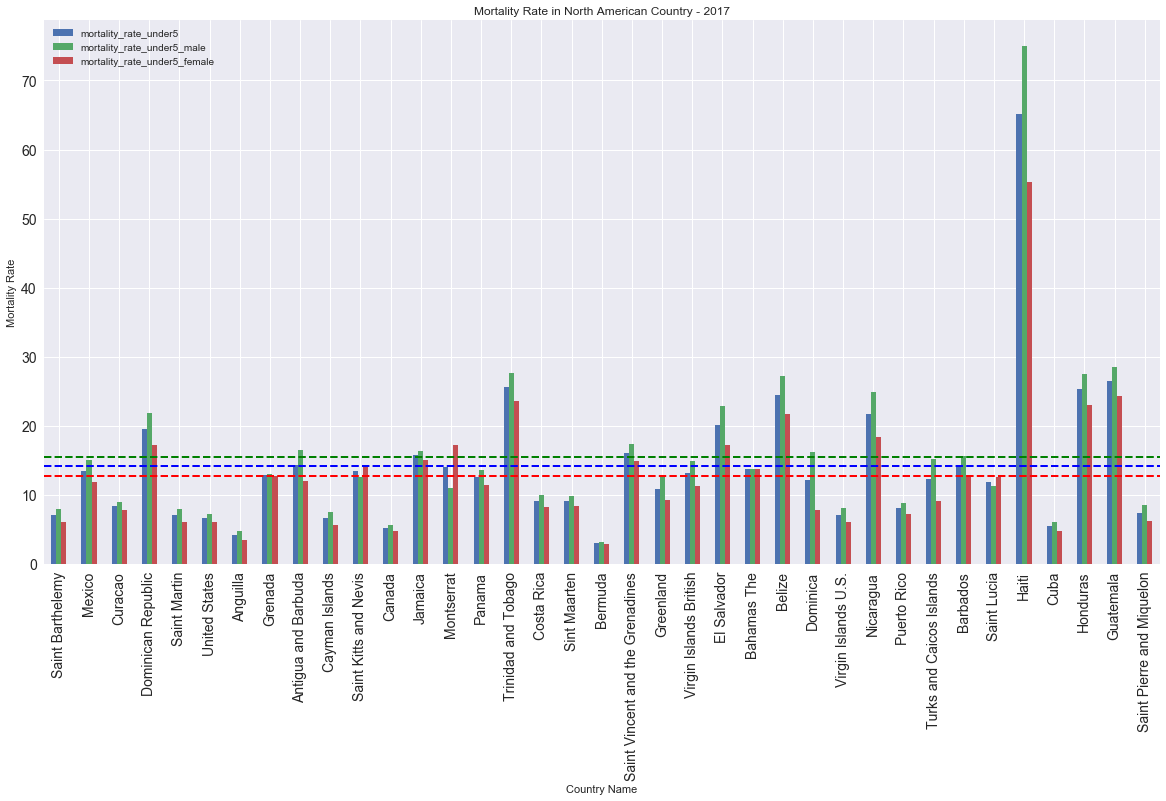

In [204]:
df_mortality_under5_NA_2017.plot.bar(figsize = (20,10), title = 'Mortality Rate in North American Country - 2017',
                                        fontsize = 14)
# Horizontal line are the average of mortality rate, mortality rate for male and female. colors are same as of bars
plt.axhline(df_mortality_under5_NA_2017['mortality_rate_under5'].mean(), color='b',linestyle='dashed',linewidth=2)
plt.axhline(df_mortality_under5_NA_2017['mortality_rate_under5_male'].mean(),
            color='g',linestyle='dashed',linewidth=2)
plt.axhline(df_mortality_under5_NA_2017['mortality_rate_under5_female'].mean(),
            color='r',linestyle='dashed',linewidth=2)
plt.ylabel('Mortality Rate')
plt.xlabel('Country Name')
plt.show()

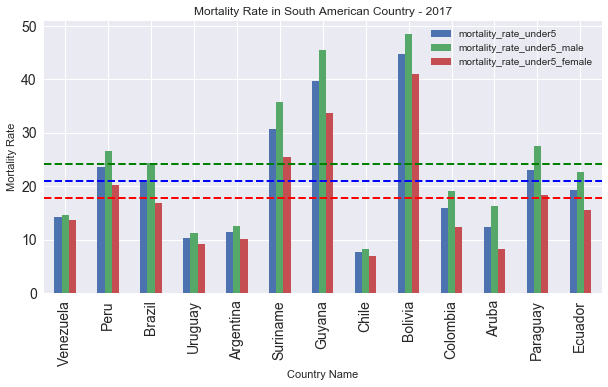

In [203]:
df_mortality_under5_SA_2017.plot.bar(figsize = (10,5), title = 'Mortality Rate in South American Country - 2017',
                                        fontsize = 14)
# Horizontal line are the average of mortality rate, mortality rate for male and female. colors are same as of bars
plt.axhline(df_mortality_under5_SA_2017['mortality_rate_under5'].mean(), color='b',linestyle='dashed',linewidth=2)
plt.axhline(df_mortality_under5_SA_2017['mortality_rate_under5_male'].mean(),
            color='g',linestyle='dashed',linewidth=2)
plt.axhline(df_mortality_under5_SA_2017['mortality_rate_under5_female'].mean(),
            color='r',linestyle='dashed',linewidth=2)
plt.ylabel('Mortality Rate')
plt.xlabel('Country Name')
plt.show()

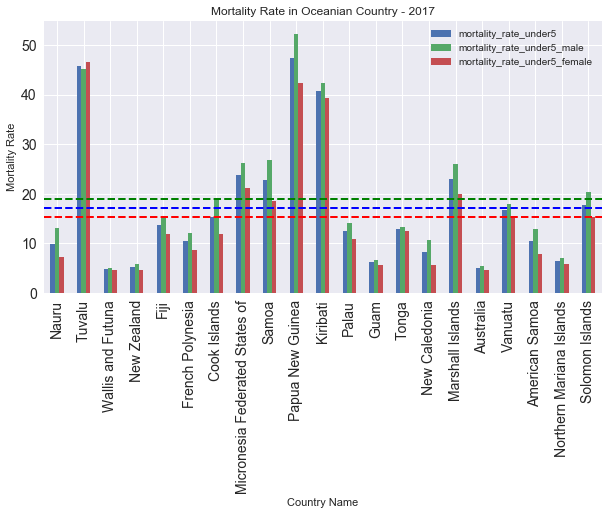

In [202]:
df_mortality_under5_Oceania_2017.plot.bar(figsize = (10,5), title = 'Mortality Rate in Oceanian Country - 2017',
                                        fontsize = 14)
# Horizontal line are the average of mortality rate, mortality rate for male and female. colors are same as of bars
plt.axhline(df_mortality_under5_Oceania_2017['mortality_rate_under5'].mean(), color='b',linestyle='dashed',linewidth=2)
plt.axhline(df_mortality_under5_Oceania_2017['mortality_rate_under5_male'].mean(),
            color='g',linestyle='dashed',linewidth=2)
plt.axhline(df_mortality_under5_Oceania_2017['mortality_rate_under5_female'].mean(),
            color='r',linestyle='dashed',linewidth=2)

plt.ylabel('Mortality Rate')
plt.xlabel('Country Name')
plt.show()

#### Conclusion ####
** In the year 2017, we can see from each(continent) of the graph above that the mean is very high (80) for the mortality rate of child under age of 5 in African Continent. Whereas rest of the world is in the range on 6-35.**

_My analysis will be continued on the african contries for last 50 years and with the rest of the world. And what is the future look like in year 2050._